In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cv2

In [2]:
data = pd.read_json('shipsnet.json')

In [3]:
data.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [104]:
data.labels.value_counts()

0    3000
1    1000
Name: labels, dtype: int64

### we know there is only 1000 ship images (with label = 1)

In [25]:
ship = data[:1000]

In [26]:
ship.tail()

,data,labels,locations,scene_ids
995,"[103, 95, 99, 108, 110, 125, 131, 125, 133, 13...",1,"[-122.34862085843947, 37.767167357603554]",20170921_181406_1031
996,"[75, 75, 75, 75, 74, 70, 69, 72, 73, 72, 70, 6...",1,"[-122.33786604607423, 37.73944613318674]",20170604_180820_0f52
997,"[75, 74, 75, 75, 74, 74, 75, 76, 76, 75, 75, 7...",1,"[-122.33284969739871, 37.71792145705744]",20170721_180825_100b
998,"[49, 50, 49, 45, 49, 53, 52, 46, 43, 44, 49, 5...",1,"[-122.35668820008198, 37.75991104734941]",20170618_180801_0f34
999,"[113, 114, 112, 110, 111, 111, 114, 110, 112, ...",1,"[-122.35032196580875, 37.767393062977916]",20170522_180635_0f42


### 3000 images with no ship (label = 0)

In [27]:
noship = data[1000:4000]

In [28]:
noship.head()

,data,labels,locations,scene_ids
1000,"[73, 75, 75, 73, 75, 75, 76, 77, 78, 78, 80, 8...",0,"[-122.33459961419122, 37.81140628875495]",20161218_180844_0e26
1001,"[165, 171, 163, 152, 142, 133, 132, 133, 130, ...",0,"[-122.13440135290679, 37.74732085488439]",20170505_181257_0e2f
1002,"[198, 202, 210, 214, 217, 221, 223, 222, 223, ...",0,"[-122.1377855013356, 37.708030696820344]",20170505_181258_0e2f
1003,"[155, 170, 175, 181, 172, 150, 124, 125, 129, ...",0,"[-122.09571903813976, 37.64920246656525]",20170905_181215_0f12
1004,"[74, 80, 80, 81, 81, 81, 82, 81, 83, 84, 80, 8...",0,"[-122.38792956593555, 37.82067246616187]",20170917_190616_0f3c


1_20180708_180909_0f47_-118.2254694333423_33.73803725920789.png

# Visualization

### Since there are so many images my goal here is to randomy select images and look at their pixel distributions. I hope to find a trent in the differnce of distributions for images that contain ships and those that do not. 

In [219]:
img_rows=80
img_cols=80
img_channels=3

In [222]:
x=[]
for image in data['data']:
    image=np.array(image)
    image=image.reshape((3, 6400)).T.reshape((80,80,3))
    x.append(image)
x=np.array(x)
y=np.array(data['labels'])

In [223]:
image_shape=(80,80,3)

In [224]:
print(x.shape)
print(y.shape)

(4000, 80, 80, 3)
(4000,)


In [295]:
#This code changes the sample pictures do not run again

#from random import sample
#plot_num_images=6
#num_imgs=x.shape[0]
#indices=sample(range(0,num_imgs+1),plot_num_images)
indices

[735, 3434, 843, 1647, 1849, 1732]

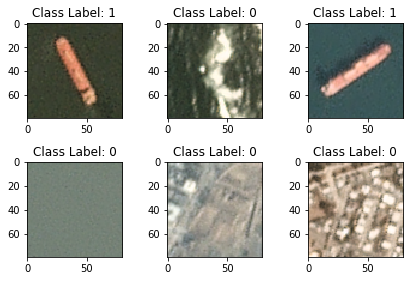

In [293]:
i=0
for index in indices:
    plt.subplot(2,3,i+1)
    img=x[index]
    plt.imshow(img)
    class_label=y[index]
    plt.title('Class Label: {}'.format(class_label))
    i+=1
plt.tight_layout()
plt.show()

# Above Image reference 

# From left to right Top Row: 735, 3434, 843, 


# Bottom Row: 1647, 1849, 1732 

I sampled these photos above because I think they are a good example of the type of images in the data set. For example we have two images that both show ships and are labeled 1 however the color of the water is different. There is also an image of just water. The pixel distr 



We have some images of land and 


These images pose different questions to the algorithm being used to detect ships. 

## Plotting the pixel distribution of ship/noship histograms

### Ship Image Distributions

Text(0.5,1,'Pixel Distribution of Image 735 (Ship)')

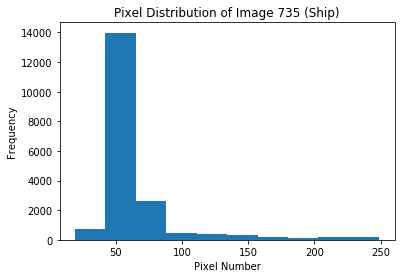

In [258]:
ship1 = ship['data'][735]
plt.hist(ship1)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 735 (Ship)')

Text(0.5,1,'Pixel Distribution of Image 843 (Ship)')

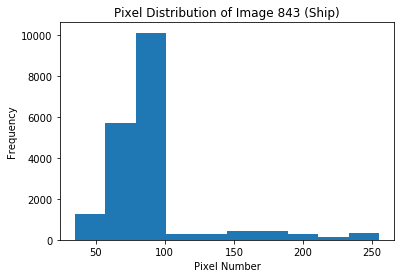

In [320]:
ship2 = ship['data'][843]
plt.hist(ship2)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 843 (Ship)')

### No ship distributions

Text(0.5,1,'Pixel Distribution of Image 1647 (No Ship)')

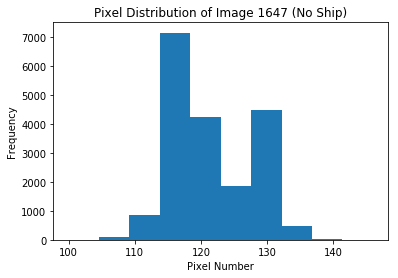

In [321]:
Noship1 = noship['data'][1647]
plt.hist(Noship1)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1647 (No Ship)')

Text(0.5,1,'Pixel Distribution of Image 1732 (No Ship)')

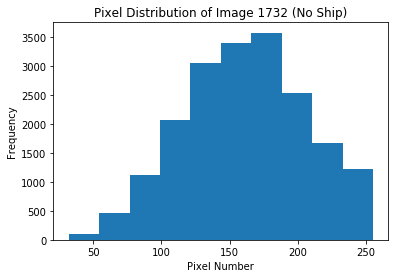

In [322]:
Noship2 = noship['data'][1732]
plt.hist(Noship2)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1732 (No Ship)')

Text(0.5,1,'Pixel Distribution of Image 1849 (No Ship)')

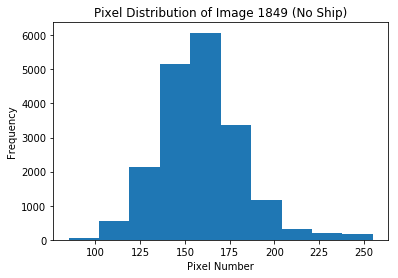

In [323]:
Noship3 = noship['data'][1849]
plt.hist(Noship3)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1849 (No Ship)')

Text(0.5,1,'Pixel Distribution of Image 3434 (No Ship)')

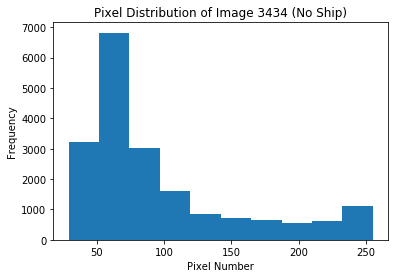

In [324]:
Noship4 = noship['data'][3434]
plt.hist(Noship4)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 3434 (No Ship)')

# RBG Pixel distribution of Ship images 

### Ship image #735 

In [325]:
R_s1 = ship1[0:6400] #red
B_s1 = ship1[6400:12800] #blue
G_s1 = ship1[12800:19200] #green

In [326]:
len(G_s1)

6400

Text(0.5,1,'Pixel Distribution of Image 735 (Ship)')

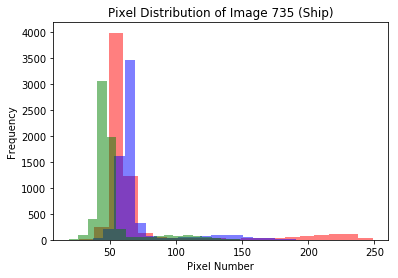

In [345]:
plt.hist(R_s1,color = 'r',bins = 20,alpha = 0.5)
plt.hist(B_s1,color = 'b',bins = 20,alpha = 0.5)
plt.hist(G_s1,color = 'g',bins = 20,alpha =0.5)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 735 (Ship)')

In [328]:
ships.head()

0    [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...
Name: data, dtype: object

### Ship image #843 

Text(0.5,1,'Pixel Distribution of Image 843 (Ship)')

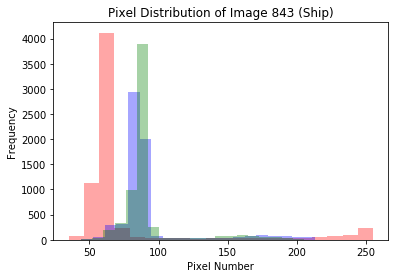

In [346]:
R_s2 = ship2[0:6400] #red
B_s2 = ship2[6400:12800] #blue
G_s2 = ship2[12800:19200] #green
plt.hist(R_s2,color = 'r',bins = 20,alpha = 0.35)
plt.hist(B_s2,color = 'b',bins = 20,alpha = 0.35)
plt.hist(G_s2,color = 'g',bins = 20,alpha =0.35)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 843 (Ship)')

# RBG Pixel distribution of No ship images 

### No Ship image 1647

Text(0.5,1,'Pixel Distribution of Image 1647 (No Ship)')

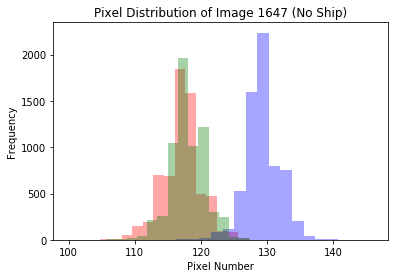

In [347]:
R_Ns1 = Noship1[0:6400] #red
B_Ns1 = Noship1[6400:12800] #blue
G_Ns1 = Noship1[12800:19200] #green
plt.hist(R_Ns1,color = 'r',bins = 20,alpha = 0.35)
plt.hist(B_Ns1,color = 'b',bins = 20,alpha = 0.35)
plt.hist(G_Ns1,color = 'g',bins = 20,alpha =0.35)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1647 (No Ship)')

This image above is all water hence the large frequency of blue pixels. However the color of the water is not pure blue so there are also red and green. 

### No Ship Image 1732

Text(0.5,1,'Pixel Distribution of Image 1732 ( No Ship)')

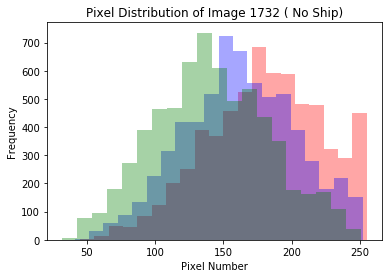

In [348]:
R_Ns2 = Noship2[0:6400] #red
B_Ns2 = Noship2[6400:12800] #blue
G_Ns2 = Noship2[12800:19200] #green
plt.hist(R_Ns2,color = 'r',bins = 20,alpha = 0.35)
plt.hist(B_Ns2,color = 'b',bins = 20,alpha = 0.35)
plt.hist(G_Ns2,color = 'g',bins = 20,alpha =0.35)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1732 ( No Ship)')

Distribution above is of the ground. Hence the very different distribution to ship images. shouldnt be too difficult for the algorithm. 

### No ship image 1849

Text(0.5,1,'Pixel Distribution of Image 1849 (No Ship)')

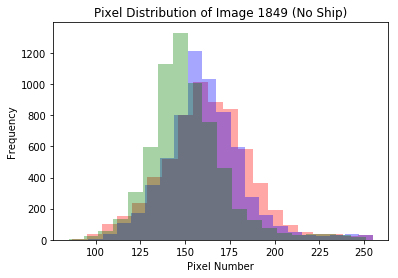

In [349]:
R_Ns3 = Noship3[0:6400] #red
B_Ns3 = Noship3[6400:12800] #blue
G_Ns3 = Noship3[12800:19200] #green
plt.hist(R_Ns3,color = 'r',bins = 20,alpha = 0.35)
plt.hist(B_Ns3,color = 'b',bins = 20,alpha = 0.35)
plt.hist(G_Ns3,color = 'g',bins = 20,alpha =0.35)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 1849 (No Ship)')

### No ship image 3434

Text(0.5,1,'Pixel Distribution of Image 3434 ( No Ship)')

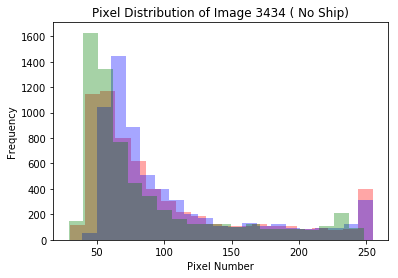

In [350]:
R_Ns4 = Noship4[0:6400] #red
B_Ns4 = Noship4[6400:12800] #blue
G_Ns4 = Noship4[12800:19200] #green
plt.hist(R_Ns4,color = 'r',bins = 20,alpha = 0.35)
plt.hist(B_Ns4,color = 'b',bins = 20,alpha = 0.35)
plt.hist(G_Ns4,color = 'g',bins = 20,alpha =0.35)
plt.xlabel('Pixel Number')
plt.ylabel('Frequency')
plt.title('Pixel Distribution of Image 3434 ( No Ship)')

This color distribution above looks very similar to the image that might contain a ship. This image has very similar color pixel distributions and should pose a problem to the algorithm. Its images like these that will confuse the algorithm and I expect some false positives 

# Statistics 


### Just some simple stats. Im going to compare some means/stds and do some T-tests in the next part of this project

Text(0.5,1,'Pixel Distribution of Image 735 (Ship)')

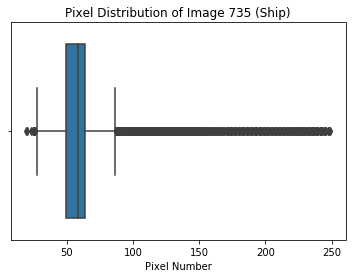

In [334]:
sns.boxplot(ship1)
plt.xlabel('Pixel Number')
plt.title('Pixel Distribution of Image 735 (Ship)')

In [335]:
np.mean(ship1)

64.98729166666666

In [336]:
np.std(ship1)

32.05027861550656

Text(0.5,1,'Pixel Distribution of Image 843 (Ship)')

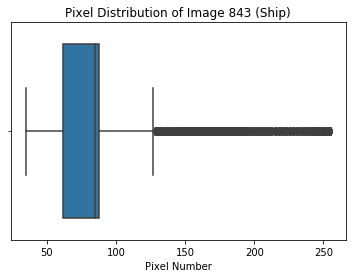

In [337]:
sns.boxplot(ship2)
plt.xlabel('Pixel Number')
plt.title('Pixel Distribution of Image 843 (Ship)')

In [338]:
np.mean(ship2)

87.28203125

In [339]:
np.std(ship2)

36.66661586226209

Text(0.5,1,'Pixel Distribution of Image 843 (Ship)')

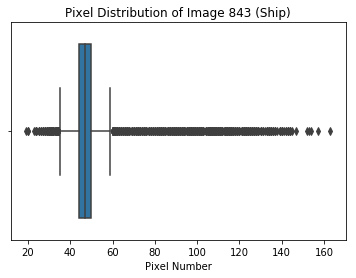

In [340]:
sns.boxplot(G_s1)
plt.xlabel('Pixel Number')
plt.title('Pixel Distribution of Image 843 (Ship)')

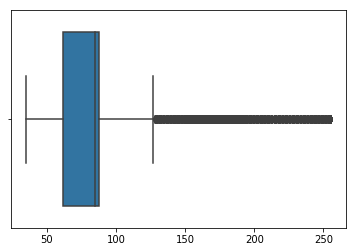

In [341]:
sns.boxplot(ship2)

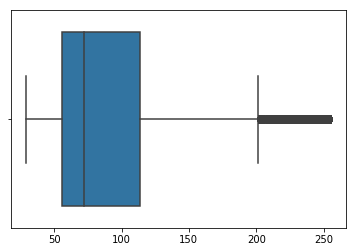

In [342]:
sns.boxplot(Noship4)

In [343]:
np.mean(ship2)

87.28203125

In [344]:
np.mean(Noship4)

96.76119791666666